<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random
np.random.seed(42)

In [22]:
#plottare anche i new infected per week
#vedere se riesco a far partire la simulazione da un po' prima (Facoltativo)


#Problem 1

##1.1

Plot the graph and variables definition

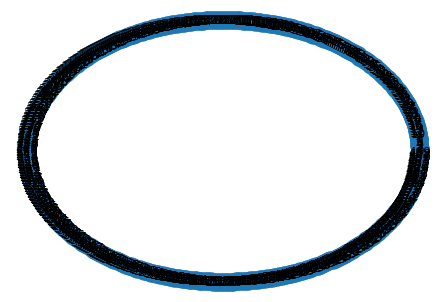

In [84]:

nodes=500
k=4


G = nx.Graph()
nx.add_cycle(G, range(nodes))
for n in range(nodes):
    other = n+3
    if other>=nodes:
        other-=nodes
    G.add_edge(other,n)

nx.draw_circular(G, with_labels=True)




In [86]:
#Array and variables definition

beta=0.3
ro=0.7
weeks=15
N=100


#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])

In [91]:
#simulation of epidemics

def MySim(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered): 
  
  #n_status_next=np.copy(n_status)
  n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    #print("settimana {}".format(i))
    new_inf=0

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf +=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2

    #print(n_status)
    #print(n_status_next)
    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)

    #print("old infected number in the week: {}".format(infected_old))
    print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_new_infected[i]=new_inf
    
    #n_status=np.copy(n_status_next)
    n_status=n_status_next
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_new_infected




In [92]:
#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_new_infected=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)

#print("Average number of infected people per week={}".format(avg_subsceptible))

infected number in the week: 22
infected number in the week: 25
infected number in the week: 16
infected number in the week: 20
infected number in the week: 15
infected number in the week: 2
infected number in the week: 2
infected number in the week: 1
infected number in the week: 1
infected number in the week: 1
infected number in the week: 0
infected number in the week: 0
infected number in the week: 0
infected number in the week: 0
infected number in the week: 0
infected number in the week: 21
infected number in the week: 14
infected number in the week: 10
infected number in the week: 8
infected number in the week: 4
infected number in the week: 6
infected number in the week: 3
infected number in the week: 3
infected number in the week: 1
infected number in the week: 1
infected number in the week: 1
infected number in the week: 0
infected number in the week: 0
infected number in the week: 0
infected number in the week: 0
infected number in the week: 11
infected number in the week: 5

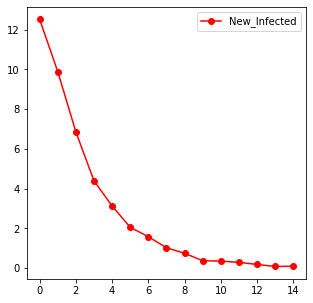

In [89]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")



ax.legend()
plt.show()

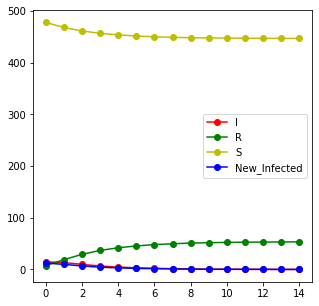

In [90]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")
ax.plot(avg_new_infected,'bo-', label="New_Infected")

ax.legend()
plt.show()



##1.2

In [64]:
def my_rand_graph(k,nodes_number):

  c=np.zeros(nodes_number,dtype=int)
  GPA = nx.complete_graph(k + 1)
  sum_degr=0


  for node in range(nodes_number):
    c[node]=k/2


  if k % 2 != 0:
    c[::2] += 1

  for i in range(k + 1, nodes_number):
    w = np.zeros(i, dtype=int)
    
    for n in GPA.nodes:
      w[n] = GPA.degree(n)

    neighbors = np.random.choice(GPA.nodes, size=c[i], replace=False, p=w/np.sum(w))
    
    for neig in neighbors:
      GPA.add_edge(i, neig)

  for no in range(nodes_number):
    sum_degr+=GPA.degree(no)
  
  avg_degree=sum_degr/len(GPA)
  
  return GPA, avg_degree



In [65]:
nodes_number=1000
k=2

G,avg_degree=my_rand_graph(k,nodes_number)


print("Graph Average degree: {}".format(avg_degree))  

Graph Average degree: 2.0


#Problem 2

In [66]:
nodes=500
k=6
beta=0.3
ro=0.7
weeks=15
N=100


G,avg_degree=my_rand_graph(k,nodes)

print("avg_degree:{}".format(avg_degree))



avg_degree:6.0


In [67]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])


#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
   

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)

print("Average number of infected people per week={}".format(avg_subsceptible))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

ValueError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")


ax.legend()
plt.show()

#Exercise 3

In [ ]:
vacc=[0,5,15,25,35,45,55,60,60,60,60,60,60,60,60]


In [ ]:
#simulation of epidemics
#status are defined as {0:'S', 1:'I', 2:'R',3:'V'}

def MySimVaccine(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_vaccinated): 

  n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    #print("settimana {}".format(i))
    #understand how many people vaccine
    perc=vacc[i]-vacc[i-1]

    tot_people=(perc*(nodes))/100
    #print("tot people:{}".format(tot_people))
    
    if i==0:
      tot_people=0
    sequence=np.append(np.where(n_status==0),np.where(n_status==1))
    sequence=np.append(sequence,np.where(n_status==2))
    #print("seq:{}".format(sequence))
    new_rand_indexes=np.random.choice(sequence, int(tot_people),replace=False)

    for index in new_rand_indexes:
      n_status[index]=3

    
    

    n_status_next=n_status
    #print(n_status_next)

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2


    

    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)
    vaccinated=np.count_nonzero(n_status_next==3)

    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_vaccinated[i]=vaccinated
    n_status=n_status_next
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_vaccinated

In [ ]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total vaccinated people each week for all simulations 
tot_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[490,490,490,490,490,490,490,490,490,490,490,490,490,490,490]])



#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R',3:'V'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_vaccinated=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_vaccinated=MySimVaccine(weeks,nodes,n_status,n_infected,n_subsceptible,n_vaccinated,n_recovered)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_vaccinated=np.concatenate((tot_vaccinated, [n_vaccinated]), axis = 0)
   

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_vaccinated=np.average(tot_vaccinated,axis=0)

print("Average number of vaccinated people per week={}".format(avg_vaccinated))

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")
ax.plot(avg_vaccinated,'bo-', label="V")


ax.legend()
plt.show()

#Problem 4